## Recursive Feature Elimination -- Boston 

1. The main idea of recursive feature elimination is to repeatedly build a model (such as a SVM or regression model) and then select the best (or worst) features (which can be selected based on the coefficients), select the selected features, and repeat the process with the remaining features until all the features are traversed. The order in which features are eliminated in this process is the order of features. Therefore, it is a greedy algorithm to find the optimal subset of features.

2. The stability of RFE depends largely on which model is used at the bottom of the iteration. For example, if RFE uses ordinary regression, the regression without regularization is unstable, then RFE is unstable; If the Ridge is used and the regression regularized by the Ridge is stable, then RFE is stable.

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.feature_selection import RFECV

In [3]:
b = datasets.load_boston() 

bos = pd.DataFrame(b.data)
bos.columns = b.feature_names
X = bos[bos.columns]
bos["PRICE"] = b.target
y = bos["PRICE"]

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(X.shape, y.shape)

(506, 13) (506,)


In [5]:
# evaluate RFE for regression
# define dataset
X, y = make_regression(n_samples=506, n_features=13, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -48.228 (5.824)


For the RFE function, the main parameters are as follows:
 - Estimator: A supervised learning estimator whose fit method provides information about the importance of a factor through the coef attribute or the feature_importances attribute
 - N_features_to_select: Indicates the number of features to be reserved. By default, half of the features are reserved
 - Step: Indicates the number of features to be deleted each time when the value is an integer. If the value is less than 1, the feature with the smallest weight is removed each time. The default value is 1

Here we used classification tree models to fit data, and we use the make_classification() function to create a binary classification problem. Also tune our hyperparameter N, which is number if features kept in final tree model by K-fold cross-validation. We print the mean and standard deviation of the model across all repeats and folds.  


Python also implements a function called pipeLine() that directly links feature selection to modeling, such as first using a decision tree for feature selection and then using a regression model training based on the selected features. Thus the pipeLine() function is equivalent to a small ensemble classifier.


Python pipeline() function can take multiple "processing data node" packaged together in sequence, the data in the previous node processing results, turn to the next node processing. All nodes must implement the 'fit()' and 'transform()' methods except the last node, which needs to implement the fit() method. When the training sample data is sent to pipeline for processing, it will call the fit() and transform() methods of nodes one by one, and then click the fit() method of the last node to fit the data

>1 0.636 (0.045)
>2 0.723 (0.046)
>3 0.816 (0.032)
>4 0.875 (0.030)
>5 0.889 (0.028)
>6 0.885 (0.032)
>7 0.888 (0.023)
>8 0.885 (0.027)
>9 0.885 (0.027)
>10 0.882 (0.022)
>11 0.885 (0.026)
>12 0.883 (0.025)


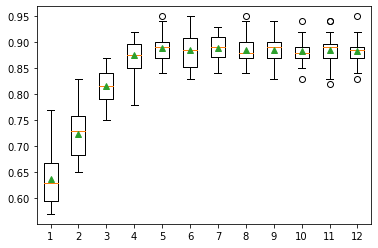

In [6]:
# explore the number of selected features for RFE
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1, 13):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [7]:
# automatically choose the number of features
rfe = RFECV(estimator=DecisionTreeClassifier())

In [8]:
# automatically select the number of features for RFE
# define dataset
X, y = make_classification(n_samples=506, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.868 (0.048)


### which features were selected

In [9]:
# report which features were selected by RFE
# define dataset
X, y = make_classification(n_samples=506, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 6.000
Column: 2, Selected False, Rank: 5.000
Column: 3, Selected False, Rank: 9.000
Column: 4, Selected False, Rank: 7.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected False, Rank: 8.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
